In [11]:
import pandas as pd
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import powerlaw

In [2]:
column_list = 'user_id,access_mode_id,logic_area_name,lac,ci,longtitude,latitude,busi_name,busi_type_name,\
app_name,app_type_name,start_time,up_pack,down_pack,up_flow,down_flow,site_name,site_channel,cont_app_id,\
cont_classify_id,cont_type_id,acce_url'.split(',')

In [3]:
data=pd.read_csv('/Users/xuhuimin/Documents/lab/labdata/beijingmobile/userexample/user_41516201.csv',names=column_list)

In [4]:
data=data[data.site_name!='其他']

In [5]:
data[data['site_name']=='百度'][['site_name','cont_app_id']].drop_duplicates()

,site_name,cont_app_id
31367215,百度,邮箱网盘类
32884764,百度,搜索类
1546147,百度,地图导航类
8495191,百度,服务类
22386275,百度,应用软件类
24642945,百度,音乐类


In [36]:
data[data['cont_type_id']=='服务与支持'][['site_name','cont_type_id']].drop_duplicates()

,site_name,cont_type_id
1613008,360手机助手,服务与支持
8495191,百度,服务与支持
23388513,百度开发者中心,服务与支持


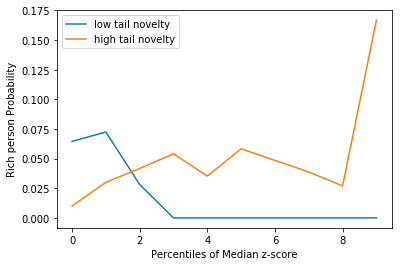

In [111]:
import pandas as pd
import pylab as pl

zscore_category=pd.read_csv('./allsite/zscore_category.csv',index_col=0)
highest=zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.05)]

median_above=zscore_category[zscore_category['pertentile_10']>0]['median'].values
highest_above=highest[highest['pertentile_10']>0]['median'].values
out_above=pd.cut(median_above,10)
highest_above=pd.cut(highest_above,bins=out_above.categories)
counts_above=out_above.value_counts()
counts_hightest_above=highest_above.value_counts()
percentage_above=counts_hightest_above.values/counts_above.values

median_below=zscore_category[zscore_category['pertentile_10']<0]['median'].values
highest_below=highest[highest['pertentile_10']<0]['median'].values
out_below=pd.cut(median_below,10)
highest_below=pd.cut(highest_below,bins=out_below.categories)
counts_below=out_below.value_counts()
counts_hightest_below=highest_below.value_counts()
percentage_below=counts_hightest_below.values/counts_below.values


pl.plot(range(0,10),percentage_above,label='low tail novelty')
pl.plot(range(0,10),percentage_below,label='high tail novelty')

pl.xlabel('Percentiles of Median z-score')
pl.ylabel('Rich person Probability')
pl.legend(loc='upper left')
pl.show()

In [13]:
zscore_category=pd.read_csv('./allsite/zscore_category.csv',index_col=0)
highest=zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.05)]

In [14]:
median_above=zscore_category[zscore_category['pertentile_10']>0]['median'].values

In [15]:
highest_above=highest[highest['pertentile_10']>0]['median'].values

In [16]:
out_above=pd.cut(median_above,11)

In [17]:
highest_above=pd.cut(highest_above,bins=out_above.categories)

In [18]:
counts_above=out_above.value_counts()

In [19]:
counts_above

(1.356, 11.923]        30
(11.923, 22.374]      288
(22.374, 32.826]       27
(32.826, 43.278]       52
(43.278, 53.73]        10
(53.73, 64.182]        29
(64.182, 74.634]        2
(74.634, 85.086]        6
(85.086, 95.537]        7
(95.537, 105.989]       6
(105.989, 116.441]      4
dtype: int64

In [20]:
counts_hightest_above=highest_above.value_counts()

In [23]:
counts_hightest_above

(1.356, 11.923]        2
(11.923, 22.374]      21
(22.374, 32.826]       1
(32.826, 43.278]       1
(43.278, 53.73]        0
(53.73, 64.182]        0
(64.182, 74.634]       0
(74.634, 85.086]       0
(85.086, 95.537]       0
(95.537, 105.989]      0
(105.989, 116.441]     0
dtype: int64

In [21]:
percentage_above=counts_hightest_above.values/counts_above.values

In [22]:
percentage_above

array([ 0.06666667,  0.07291667,  0.03703704,  0.01923077,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [ ]:
median_below=zscore_category[zscore_category['pertentile_10']<0]['median'].values

In [52]:
highest_below=highest[highest['pertentile_10']<0]['median'].values

In [53]:
out_below=pd.cut(median_below,11)

In [82]:
highest_below=pd.cut(highest_below,bins=out_below.categories)

In [54]:
counts_below=out_below.value_counts()

In [58]:
counts_hightest_below=highest_below.value_counts()

In [60]:
percentage_below=counts_hightest_below.values/counts_below.values

In [74]:
pl.plot(range(0,11),percentage_above,label='low tail novelty')
pl.plot(range(0,11),percentage_below,label='high tail novelty')
pl.legend(loc='upper left')

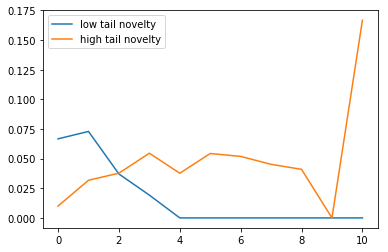

In [75]:
pl.show()

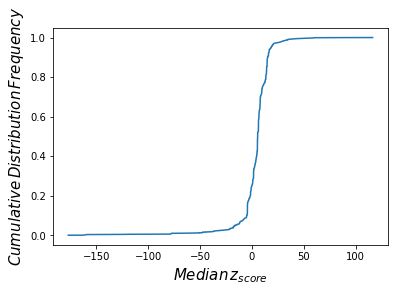

In [6]:
median=zscore_category['median'].values
x, px = powerlaw.cdf(median)
plt.plot(x, px)
plt.xlabel('$Median\,z_{score}$',fontsize=15)
plt.ylabel('$Cumulative\,Distribution\,Frequency$',fontsize=15)

# x0=0

# plt.plot([x0, x0,], [0, y0,], 'k--', linewidth=1.0)
# plt.scatter([x0, ],[y0, ], s=50, color='r') 

# plt.yscale('log')
# plt.xscale('log')
plt.show()

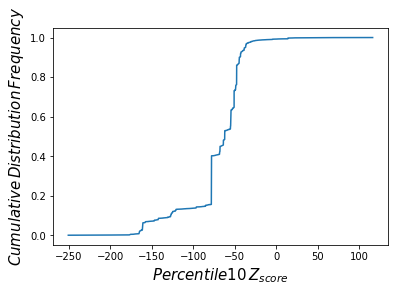

In [8]:
percentile_10=zscore_category['pertentile_10'].values
x, px = powerlaw.cdf(percentile_10)
plt.plot(x, px)
plt.xlabel('$Percentile10\,Z_{score}$',fontsize=15)
plt.ylabel('$Cumulative\,Distribution\,Frequency$',fontsize=15)

# x0=0

# plt.plot([x0, x0,], [0, y0,], 'k--', linewidth=1.0)
# plt.scatter([x0, ],[y0, ], s=50, color='r') 

# plt.yscale('log')
# plt.xscale('log')
plt.show()

In [17]:
zscore_category['user_id'].nunique()

60226

In [15]:
highest_fees=zscore_category.sort_values(by=['fees'],ascending=False)[:int(len(zscore_category)*0.05)]
print(len(highest_fees[highest_fees.category=='low_high'])/len(zscore_category[zscore_category.category=='low_high']))
print(len(highest_fees[highest_fees.category=='low_low'])/len(zscore_category[zscore_category.category=='low_low']))
print(len(highest_fees[highest_fees.category=='high_high'])/len(zscore_category[zscore_category.category=='high_high']))
print(len(highest_fees[highest_fees.category=='high_low'])/len(zscore_category[zscore_category.category=='high_low']))

0.04955763768731024
0.043478260869565216
0.05100569781011876
0.0136986301369863


In [16]:
highest_termnial=zscore_category.sort_values(by=['terminal_price'],ascending=False)[:int(len(zscore_category)*0.05)]
print(len(highest_termnial[highest_termnial.category=='low_high'])/len(zscore_category[zscore_category.category=='low_high']))
print(len(highest_termnial[highest_termnial.category=='low_low'])/len(zscore_category[zscore_category.category=='low_low']))
print(len(highest_termnial[highest_termnial.category=='high_high'])/len(zscore_category[zscore_category.category=='high_high']))
print(len(highest_termnial[highest_termnial.category=='high_low'])/len(zscore_category[zscore_category.category=='high_low']))

0.05442199079364043
0.043478260869565216
0.04527356353401524
0.0547945205479452


In [26]:
zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.05)]

,user_id,median,pertentile_10,category,terminal_price,fees
15961,46062728,-36.846318,-36.846318,low_high,11388.0,170.53
47337,41612685,-4.441587,-78.249395,low_high,11388.0,110.54
54269,42844686,14.054207,-47.775282,high_high,11388.0,98.15
50498,114282543,-73.454026,-163.539042,low_high,11388.0,50.20
39072,34164634,20.165196,-78.249395,high_high,11388.0,48.92
13955,40845803,14.588432,-54.950715,high_high,11388.0,45.20
21533,50085565,1.576543,-161.496485,low_high,11388.0,43.80
35074,32321516,-4.441587,-127.415471,low_high,11388.0,43.30
38719,33366031,16.540723,-35.563088,high_high,11388.0,34.20
13123,61619926,13.886095,-165.581599,high_high,11388.0,20.44


In [37]:
highest=zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.05)]
print(len(highest[highest.category=='low_high'])/len(zscore_category[zscore_category.category=='low_high']))
print(len(highest[highest.category=='low_low'])/len(zscore_category[zscore_category.category=='low_low']))
print(len(highest[highest.category=='high_high'])/len(zscore_category[zscore_category.category=='high_high']))
print(len(highest[highest.category=='high_low'])/len(zscore_category[zscore_category.category=='high_low']))

0.053703764160491003
0.08695652173913043
0.04602869499553786
0.05251141552511415


In [23]:
print(len(highest[highest.category=='low_high']))
print(len(highest[highest.category=='low_low']))
print(len(highest[highest.category=='high_high']))
print(len(highest[highest.category=='high_low']))

1645
2
1341
23


In [24]:
print(len(zscore_category[zscore_category.category=='low_high']))
print(len(zscore_category[zscore_category.category=='low_low']))
print(len(zscore_category[zscore_category.category=='high_high']))
print(len(zscore_category[zscore_category.category=='high_low']))

30631
23
29134
438


In [3]:
convention=zscore_category[(zscore_category['pertentile_10']>0)].index
zscore_category.ix[convention,'category1']='convention'

novel=zscore_category[(zscore_category['median']<0)&(zscore_category['pertentile_10']<=0)].index
zscore_category.ix[novel,'category1']='novel'

median=zscore_category[(zscore_category['median']>0)&(zscore_category['pertentile_10']<=0)].index
zscore_category.ix[median,'category1']='median'


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [11]:
zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.05)]

,user_id,median,pertentile_10,category,terminal_price,fees,category1
15961,46062728,-36.846318,-36.846318,low_high,11388.0,170.53,novel
47337,41612685,-4.441587,-78.249395,low_high,11388.0,110.54,novel
54269,42844686,14.054207,-47.775282,high_high,11388.0,98.15,median
50498,114282543,-73.454026,-163.539042,low_high,11388.0,50.20,novel
39072,34164634,20.165196,-78.249395,high_high,11388.0,48.92,median
13955,40845803,14.588432,-54.950715,high_high,11388.0,45.20,median
21533,50085565,1.576543,-161.496485,low_high,11388.0,43.80,median
35074,32321516,-4.441587,-127.415471,low_high,11388.0,43.30,novel
38719,33366031,16.540723,-35.563088,high_high,11388.0,34.20,median
13123,61619926,13.886095,-165.581599,high_high,11388.0,20.44,median


In [5]:
highest=zscore_category.sort_values(by=['terminal_price','fees'],ascending=False)[:int(len(zscore_category)*0.05)]
print(len(highest[highest.category1=='convention'])/len(zscore_category[zscore_category.category1=='convention']))
print(len(highest[highest.category1=='novel'])/len(zscore_category[zscore_category.category1=='novel']))
print(len(highest[highest.category1=='median'])/len(zscore_category[zscore_category.category1=='median']))

0.05422993492407809
0.05736790285526747
0.04742869975297552


In [3]:
node=pd.read_csv('./allsite/node.csv',names=['user_id','site','cont_app_type'])

In [4]:
node[node['cont_app_type']=='即时聊天类']

,user_id,site,cont_app_type
4029754,50785931,腾讯图片服务即时聊天类,即时聊天类
4109404,50785931,腾讯网即时聊天类,即时聊天类
38187102,50785931,腾讯头像网即时聊天类,即时聊天类
29674623,50785931,人人网即时聊天类,即时聊天类
7478422,42280517,腾讯网即时聊天类,即时聊天类
7559459,42280517,谷歌Gchat聊天工具图片即时聊天类,即时聊天类
11212449,42280517,腾讯头像网即时聊天类,即时聊天类
3238985,40688293,腾讯头像网即时聊天类,即时聊天类
13798011,40688293,腾讯网即时聊天类,即时聊天类
21117381,40688293,腾讯图片服务即时聊天类,即时聊天类


In [5]:
node[node['cont_app_type']=='社交类']

,user_id,site,cont_app_type
14787285,50785931,腾讯网社交类,社交类
29659249,50785931,人人网社交类,社交类
11231027,42280517,腾讯网社交类,社交类
19347972,40688293,UC浏览器官网社交类,社交类
14056083,40688293,人人网社交类,社交类
7156403,40688293,QQ空间图片服务社交类,社交类
18798611,31430787,UC浏览器官网社交类,社交类
4217078,31430787,腾讯网社交类,社交类
4229495,31430787,QQ空间图片服务社交类,社交类
9512055,31430787,陌陌社交类,社交类


In [6]:
node['user_id'].nunique()

62238

In [3]:
len(node)

2706074

In [6]:
node['site'].nunique()

1638

In [8]:
node['cont_app_type'].unique()

array(['即时聊天类', '新闻类', '服务类', '地图导航类', '电子商务类', '应用软件类', '生活类', '数码类',
       '图片类', '工具类', '下载类', '邮箱网盘类', '音乐类', '搜索类', '视频类', '论坛社区类', '阅读类',
       '博客类', '社交类', '游戏类', '微博类', '体育类', '商旅类', '文化类', '博彩类', '房产类',
       '汽车类', '动漫类', '美食类', '教育类'], dtype=object)

In [7]:
observed_value=pd.read_csv('./allsite/observed_value.csv',index_col=0)

In [10]:
observed_value=observed_value[['pair','z_score']]

In [11]:
observed_value.sort_values(by=['z_score'],ascending=False)

,pair,z_score
252,搜索类 论坛社区类,188.721110
487,论坛社区类 文化类,187.317298
8,即时聊天类 图片类,163.343238
650,汽车类 汽车类,162.753718
187,工具类 论坛社区类,150.411311
790,房产类 房产类,134.454294
13,即时聊天类 搜索类,129.006031
732,美食类 美食类,128.040356
35,新闻类 论坛社区类,126.852446
631,图片类 汽车类,121.716271


In [14]:
observed_value['node1']=observed_value['pair'].map(lambda x: x.split(' ')[0])
observed_value['node2']=observed_value['pair'].map(lambda x: x.split(' ')[1])

In [17]:
overlap=observed_value[observed_value['node1']==observed_value['node2']]

In [18]:
len(overlap)

30

In [20]:
overlap[['pair','z_score']]

,pair,z_score
650,汽车类 汽车类,162.753718
790,房产类 房产类,134.454294
732,美食类 美食类,128.040356
284,论坛社区类 论坛社区类,97.022577
85,电子商务类 电子商务类,95.145182
684,数码类 数码类,91.713151
596,商旅类 商旅类,91.177031
556,游戏类 游戏类,91.045209
279,视频类 视频类,74.782295
575,博彩类 博彩类,59.300060


In [32]:
columns = 'user_id，sex，age，occupation_name，education_name，user_opentime，brand_name，call_duration_m，gprs_flow，\
call_fee，gprs_fee，databusiness_fee，order_name，brand_chn，model_chn，screensize，operation_sys，terminal_price，\
dept_county_name，dept_name'.split('，')

basename=pd.read_csv('./basename.csv', encoding='gbk', names=columns)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
basename[basename['terminal_price']==11388.0]

,user_id,sex,age,occupation_name,education_name,user_opentime,brand_name,call_duration_m,gprs_flow,call_fee,gprs_fee,databusiness_fee,order_name,brand_chn,model_chn,screensize,operation_sys,terminal_price,dept_county_name,dept_name
5686,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,139邮箱-免费版,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5687,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,彩信连连发,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5688,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,短信回执,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5689,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,12580生活播报-生活百科彩信版,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5690,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,WLAN产品WLAN-标准资费,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5691,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,飞信,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5692,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,晚间天气预报,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5693,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,新闻早晚报,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5694,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,掌上精彩,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
5695,36193500,男,32.0,NaN,NaN,20051107.0,全球通,1601.0,6.43,NaN,5.00,12.0,生活播报,三星,W2013,3.0,ANDROID,11388.0,顺义分公司,片区不详
